In [2]:
import pandas as pd
import numpy as np

importing data

In [5]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
crop.shape

(2200, 8)

In [9]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [13]:
crop.duplicated().sum()

0

In [15]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [79]:
crop.corr(numeric_only=True)

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


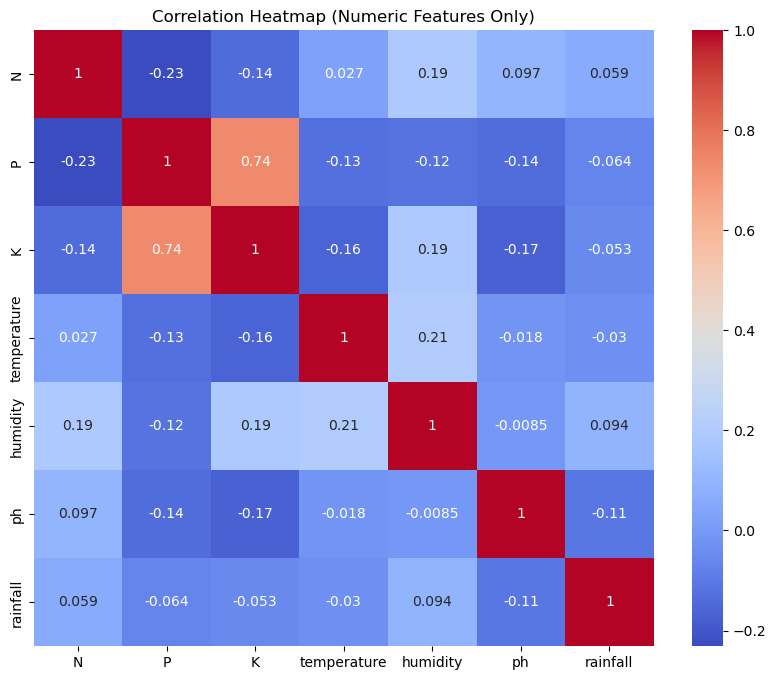

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
crop_numeric = crop.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crop_numeric.corr(), annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [35]:
crop.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [33]:
crop['label'].unique().size

22

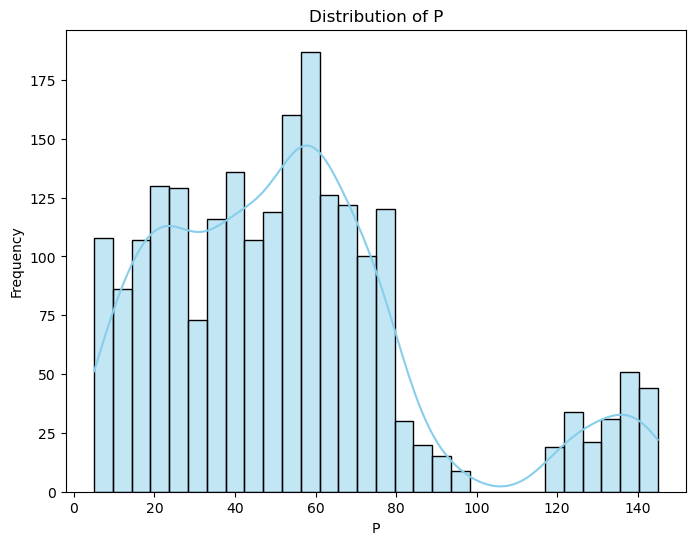

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for column 'P'
plt.figure(figsize=(8, 6))
sns.histplot(crop['P'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of P")
plt.xlabel("P")
plt.ylabel("Frequency")
plt.show()

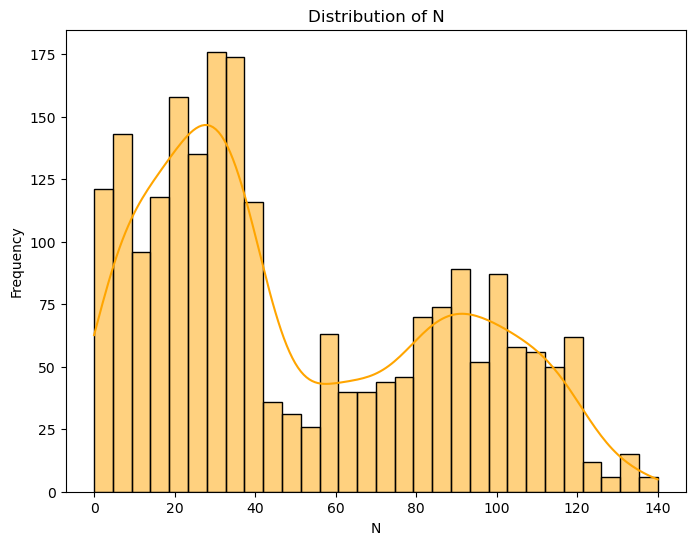

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for column 'N'
plt.figure(figsize=(8, 6))
sns.histplot(crop['N'], kde=True, bins=30, color='orange')
plt.title("Distribution of N")
plt.xlabel("N")
plt.ylabel("Frequency")
plt.show()

In [27]:
crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop['label'] = crop['label'].map(crop_dict)

In [39]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [41]:
crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [43]:
crop.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [73]:
X=crop.drop('label', axis = 1)
y=crop['label']

In [109]:
X.shape

(2200, 7)

In [113]:
y.shape

(2200,)

In [49]:
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [107]:
X.head()


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [52]:
X_train.shape

(1760, 7)

In [117]:
X_test.shape

(440, 7)

In [77]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [54]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

TRAINING MODELS


In [155]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create dictionary of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier()
}

# Train & evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} -> Accuracy: {acc:.4f}")

Logistic Regression -> Accuracy: 1.0000
Naive Bayes -> Accuracy: 0.9778
Support Vector Machine -> Accuracy: 1.0000
K-Nearest Neighbors -> Accuracy: 1.0000
Decision Tree -> Accuracy: 1.0000
Random Forest -> Accuracy: 1.0000
Bagging -> Accuracy: 1.0000
AdaBoost -> Accuracy: 1.0000
Gradient Boosting -> Accuracy: 1.0000
Extra Trees -> Accuracy: 0.9556


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [157]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

Logistic Regression model with accuracy: 1.0
Naive Bayes model with accuracy: 0.9777777777777777
Support Vector Machine model with accuracy: 1.0
K-Nearest Neighbors model with accuracy: 1.0
Decision Tree model with accuracy: 1.0
Random Forest model with accuracy: 1.0
Bagging model with accuracy: 1.0
AdaBoost model with accuracy: 1.0
Gradient Boosting model with accuracy: 1.0
Extra Trees model with accuracy: 1.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [159]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [161]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [173]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [165]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [213]:
N= 40

P = 50

k = 50

temperature = 40.0

humidity = 20

ph = 100

rainfall = 100

predict = recommendation (N, P, k, temperature, humidity,ph, rainfall)

crop_dict={1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange", 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana", 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans", 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:

    crop=crop_dict[predict[0]]

    print("{} is a best crop to be cultivated ".format(crop))
else :
    print("Sorry are not able to recommend a proper crop for this environment ")

Sorry are not able to recommend a proper crop for this environment 


'chickpea'

In [211]:
predict

'chickpea'

In [187]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))